In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_excel('/content/Data  Forecasting.xlsx')


BadZipFile: ignored

In [ ]:
df.head()

,Date,Time Block,DEMAND (MW)
0,2016-04-01,00:00-00:15,2476.551758
1,2016-04-01,00:15-00:30,2474.914551
2,2016-04-01,00:30-00:45,2494.891602
3,2016-04-01,00:45-01:00,2478.232178
4,2016-04-01,01:00-01:15,2457.470459


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Date         175296 non-null  datetime64[ns]
 1   Time Block   175296 non-null  object        
 2   DEMAND (MW)  175129 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 4.0+ MB


In [ ]:
df['MonthYr']=np.nan

In [ ]:
df.head()

,Date,Time Block,DEMAND (MW),MonthYr
0,2016-04-01,00:00-00:15,2476.551758,NaN
1,2016-04-01,00:15-00:30,2474.914551,NaN
2,2016-04-01,00:30-00:45,2494.891602,NaN
3,2016-04-01,00:45-01:00,2478.232178,NaN
4,2016-04-01,01:00-01:15,2457.470459,NaN


In [ ]:
for i in range(len(df)):
  # df['MonthYr'][i]=int(str(pd.DatetimeIndex(df['Date']).year[i])+str(pd.DatetimeIndex(df['Date']).month[i]))
  df['MonthYr'][i]=str(df['Date'][i])[0:7]

<ipython-input-10-0897ef799b02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MonthYr'][i]=str(df['Date'][i])[0:7]
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Date         175296 non-null  datetime64[ns]
 1   Time Block   175296 non-null  object        
 2   DEMAND (MW)  175129 non-null  object        
 3   MonthYr      175296 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 5.3+ MB


In [ ]:
df['DEMAND (MW)']=df['DEMAND (MW)'].fillna('0')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Date         175296 non-null  datetime64[ns]
 1   Time Block   175296 non-null  object        
 2   DEMAND (MW)  175296 non-null  object        
 3   MonthYr      175296 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 5.3+ MB


In [ ]:
for i in range(len(df)):
  try:
    df['DEMAND (MW)'][i]=float(df['DEMAND (MW)'][i])
  except:
    df['DEMAND (MW)'][i]=float(0)


<ipython-input-14-030d589fc730>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DEMAND (MW)'][i]=float(df['DEMAND (MW)'][i])
<ipython-input-14-030d589fc730>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DEMAND (MW)'][i]=float(0)


In [ ]:
df

,Date,Time Block,DEMAND (MW),MonthYr
0,2016-04-01,00:00-00:15,2476.551758,2016-04
1,2016-04-01,00:15-00:30,2474.914551,2016-04
2,2016-04-01,00:30-00:45,2494.891602,2016-04
3,2016-04-01,00:45-01:00,2478.232178,2016-04
4,2016-04-01,01:00-01:15,2457.470459,2016-04
...,...,...,...,...
175291,2021-03-31,22:45-23:00,4781.0,2021-03
175292,2021-03-31,23:00-23:15,4784.0,2021-03
175293,2021-03-31,23:15-23:30,4747.0,2021-03
175294,2021-03-31,23:30-23:45,4717.0,2021-03


In [ ]:
d=df.groupby(['MonthYr'], sort=False)['DEMAND (MW)'].max()

In [ ]:
new_df=pd.DataFrame()
new_df['MonthYr']=d.index
new_df['Demand']=list(d)

In [ ]:
new_df.to_csv('Monthly_Peak_Demand.csv')

In [ ]:
df=pd.read_csv('/content/Monthly_Peak_Demand.csv')

In [ ]:
df.head()

,Unnamed: 0,MonthYr,Demand
0,0,2016-04,3733.257568
1,1,2016-05,3702.780518
2,2,2016-06,3594.497803
3,3,2016-07,3614.580078
4,4,2016-08,3600.359863


In [ ]:
temp=pd.read_csv('/content/temp.csv')
temp.head()

,Month,Temperature_degC,Unnamed: 2
0,Apr-16,34.5,NaN
1,May-16,34.0,NaN
2,Jun-16,34.0,NaN
3,Jul-16,29.9,NaN
4,Aug-16,29.5,NaN


In [ ]:
temp['Peak Demand']=new_df['Demand']

In [ ]:
new_df

,MonthYr,Demand
0,2016-04,3733.257568
1,2016-05,3702.780518
2,2016-06,3594.497803
3,2016-07,3614.580078
4,2016-08,3600.359863
5,2016-09,3546.623291
6,2016-10,3724.845703
7,2016-11,3670.239502
8,2016-12,3569.344482
9,2017-01,3658.810303


In [ ]:
temp

,Month,Temperature_degC,Unnamed: 2,Peak Demand
0,Apr-16,34.5,NaN,3733.257568
1,May-16,34.0,NaN,3702.780518
2,Jun-16,34.0,NaN,3594.497803
3,Jul-16,29.9,NaN,3614.580078
4,Aug-16,29.5,NaN,3600.359863
...,...,...,...,...
67,Nov-21,21.4,NaN,NaN
68,Dec-21,16.8,NaN,NaN
69,Jan-22,15.9,NaN,NaN
70,Feb-22,19.9,NaN,NaN


In [ ]:
xtrain=temp['Temperature_degC'][0:60]
ytrain=temp['Peak Demand'][0:60]
xtest=temp['Temperature_degC'][60:]

In [ ]:
xtrain

0     34.5
1     34.0
2     34.0
3     29.9
4     29.5
5     28.0
6     25.2
7     19.8
8     16.4
9     16.9
10    20.7
11    25.7
12    32.3
13    34.2
14    34.6
15    29.2
16    28.8
17    28.6
18    26.8
19    21.9
20    18.4
21    14.6
22    21.3
23    27.4
24    30.9
25    32.9
26    34.3
27    31.6
28    29.3
29    28.6
30    26.3
31    22.7
32    17.0
33    17.0
34    20.8
35    25.6
36    31.9
37    35.2
38    35.8
39    30.5
40    29.6
41    28.1
42    24.4
43    20.8
44    14.9
45    14.9
46    16.4
47    22.8
48    31.9
49    34.2
50    34.7
51    30.2
52    29.3
53    28.3
54    25.8
55    21.8
56    17.0
57    16.1
58    20.3
59    26.0
Name: Temperature_degC, dtype: float64

In [ ]:
ytrain

0     3733.257568
1     3702.780518
2     3594.497803
3     3614.580078
4     3600.359863
5     3546.623291
6     3724.845703
7     3670.239502
8     3569.344482
9     3658.810303
10    3594.943604
11    3639.819336
12    3897.640137
13    4068.956543
14    4169.761230
15    4130.079590
16    4185.077637
17    4520.675293
18    4499.138672
19    3767.180908
20    3895.735596
21    4229.169434
22    4029.863281
23    4414.314453
24    4604.813965
25    4819.042480
26    4867.044434
27    4927.201172
28    4876.812500
29    5032.337891
30    5090.882812
31    4493.042480
32    4176.500977
33    4307.581055
34    4125.827148
35    4459.526270
36    5007.299512
37    5346.299902
38    5547.637793
39    5397.578418
40    5803.138818
41    5857.295866
42    5096.482308
43    4314.000000
44    4593.000000
45    4528.000000
46    4337.193555
47    4147.286759
48    4823.283398
49    5437.691618
50    5780.448275
51    5864.633187
52    5890.135843
53    5959.240000
54    5838.000000
55    4616

In [ ]:
import matplotlib.pyplot as plt

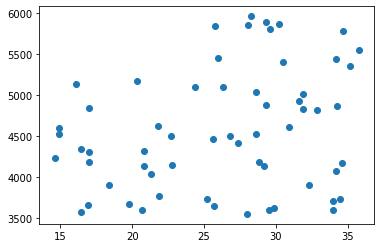

In [ ]:
plt.scatter(xtrain,ytrain)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
xtrain=np.array(xtrain)
ytrain=np.array(ytrain)
xtest=np.array(xtest)

In [ ]:
xtrain

array([34.5, 34. , 34. , 29.9, 29.5, 28. , 25.2, 19.8, 16.4, 16.9, 20.7,
       25.7, 32.3, 34.2, 34.6, 29.2, 28.8, 28.6, 26.8, 21.9, 18.4, 14.6,
       21.3, 27.4, 30.9, 32.9, 34.3, 31.6, 29.3, 28.6, 26.3, 22.7, 17. ,
       17. , 20.8, 25.6, 31.9, 35.2, 35.8, 30.5, 29.6, 28.1, 24.4, 20.8,
       14.9, 14.9, 16.4, 22.8, 31.9, 34.2, 34.7, 30.2, 29.3, 28.3, 25.8,
       21.8, 17. , 16.1, 20.3, 26. ])

In [ ]:
xtrain=xtrain.reshape([60,1])
ytrain=ytrain.reshape([60,1])

In [ ]:
xtrain

array([[34.5],
       [34. ],
       [34. ],
       [29.9],
       [29.5],
       [28. ],
       [25.2],
       [19.8],
       [16.4],
       [16.9],
       [20.7],
       [25.7],
       [32.3],
       [34.2],
       [34.6],
       [29.2],
       [28.8],
       [28.6],
       [26.8],
       [21.9],
       [18.4],
       [14.6],
       [21.3],
       [27.4],
       [30.9],
       [32.9],
       [34.3],
       [31.6],
       [29.3],
       [28.6],
       [26.3],
       [22.7],
       [17. ],
       [17. ],
       [20.8],
       [25.6],
       [31.9],
       [35.2],
       [35.8],
       [30.5],
       [29.6],
       [28.1],
       [24.4],
       [20.8],
       [14.9],
       [14.9],
       [16.4],
       [22.8],
       [31.9],
       [34.2],
       [34.7],
       [30.2],
       [29.3],
       [28.3],
       [25.8],
       [21.8],
       [17. ],
       [16.1],
       [20.3],
       [26. ]])

In [ ]:
xtest=xtest.reshape([12,1])

In [ ]:
model1=LinearRegression()
model1.fit(xtrain,ytrain)
y_pred=model1.predict(xtest)

In [ ]:
forecast=list(y_pred.flatten())

In [ ]:
forecast

[4749.8956644727405,
 4803.690492191631,
 4821.622101431261,
 4690.123633673973,
 4660.237618274589,
 4630.351602875206,
 4552.647962836808,
 4424.138096619458,
 4286.662425782294,
 4259.765011922848,
 4379.309073520383,
 4546.670759756931]

In [ ]:
result=pd.DataFrame()

In [ ]:
result['Month']=temp['Month'][60:]

In [ ]:
result['Forecasted Demand']=forecast

In [ ]:
result

,Month,Forecasted Demand
60,Apr-21,4749.895664
61,May-21,4803.690492
62,Jun-21,4821.622101
63,Jul-21,4690.123634
64,Aug-21,4660.237618
65,Sep-21,4630.351603
66,Oct-21,4552.647963
67,Nov-21,4424.138097
68,Dec-21,4286.662426
69,Jan-22,4259.765012


In [ ]:
result.to_csv('result.csv')